# **Lab 6: Euler’s Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Euler's method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Euler's method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Euler’s method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Euler's method.
$$\theta_{i+1} = \theta_i + f(t_i, \theta_i)(t_{i+1}-t_i)$$ where $h=t_{i+1}-t_i$ is the step size.

In [ ]:
def f(t, theta):
    #Write your code here.
    res = -2.2067e-12 * (theta**4 - 81e8)
    return res

def Euler(x_0, y_0, h, x):
    #Write your code here.
    steps = int((x - x_0) / h)
    x_i = x_0
    y_i = y_0

    for i in range(steps):
        y_i += f(x_i, y_i) * h
        x_i += h

    return y_i

In [ ]:
print(f'Temperature at t = 480s with step size h = 240s is {Euler(0,1200,240,480)}K')

Temperature at t = 480s with step size h = 240s is 110.31739981426284K


Your answer should be $\approx 110.32K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

In [ ]:
# Write your code here.
import numpy as np
from scipy.optimize import fsolve

def exact_equation(theta, t):
    return 0.92593 * np.log((theta - 300) / (theta + 300)) - 1.8519 * np.arctan(0.333e-2 * theta) + 0.22067e-3 * t + 2.9282

t = 480

theta_initial_guess = 1200

theta_exact = fsolve(exact_equation, theta_initial_guess, args=(t,))[0]

print(f"The exact solution at t = {t} seconds is theta = {theta_exact:.4f}")


The exact solution at t = 480 seconds is theta = 646.4959


The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [ ]:

def Euler(x_0, y_0, h, x):
    #Write your code here.
    steps = int((x - x_0) / h)
    x_i = x_0
    y_i = y_0

    for i in range(steps):
        y_i += f(x_i, y_i) * h
        x_i += h

    return y_i

t_0 = 0
theta_0 = 1200
t_target = 480
step_sizes = [480, 240, 120, 60, 30]
approximate_temperatures = []
exact_temperatures = []

for h in step_sizes:
    approximate_temperature = Euler(t_0, theta_0, h, t_target)
    exact_solution = fsolve(exact_equation, theta_initial_guess, args=(t_target,))[0]
    global_truncation_error = exact_solution - approximate_temperature
    absolute_relative_true_error = abs((exact_solution - approximate_temperature) / exact_solution) * 100

    print(f"\nStep Size: {h} seconds")
    print("Approximate temperature:", approximate_temperature)
    print("Global Truncation Error (Et):", global_truncation_error)
    print("Absolute Relative True Error (|εt|%):", absolute_relative_true_error)



Step Size: 480 seconds
Approximate temperature: -987.8106479999997
Global Truncation Error (Et): 1634.3065146612832
Absolute Relative True Error (|εt|%): 252.79458059049585

Step Size: 240 seconds
Approximate temperature: 110.31739981426284
Global Truncation Error (Et): 536.1784668470207
Absolute Relative True Error (|εt|%): 82.93610129574716

Step Size: 120 seconds
Approximate temperature: 546.7749771189773
Global Truncation Error (Et): 99.72088954230628
Absolute Relative True Error (|εt|%): 15.424830178311522

Step Size: 60 seconds
Approximate temperature: 614.9661408677375
Global Truncation Error (Et): 31.52972579354605
Absolute Relative True Error (|εt|%): 4.877018929196853

Step Size: 30 seconds
Approximate temperature: 632.7666626119995
Global Truncation Error (Et): 13.729204049284021
Absolute Relative True Error (|εt|%): 2.123633693156637


Your values should approximately match the values of this table.
<br>
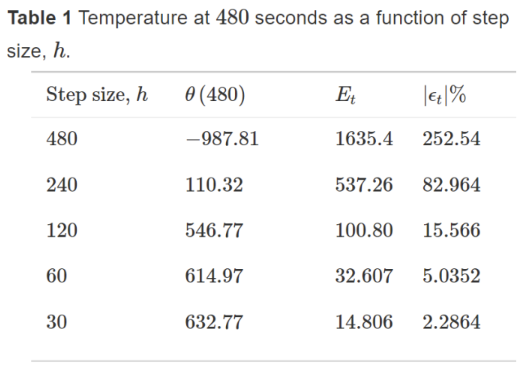

## Task 3
Generate a Temperature $\theta$ vs Step size $h$ plot which portrays the effect of step size in Euler's method. Use a different marker to represent the exact value.

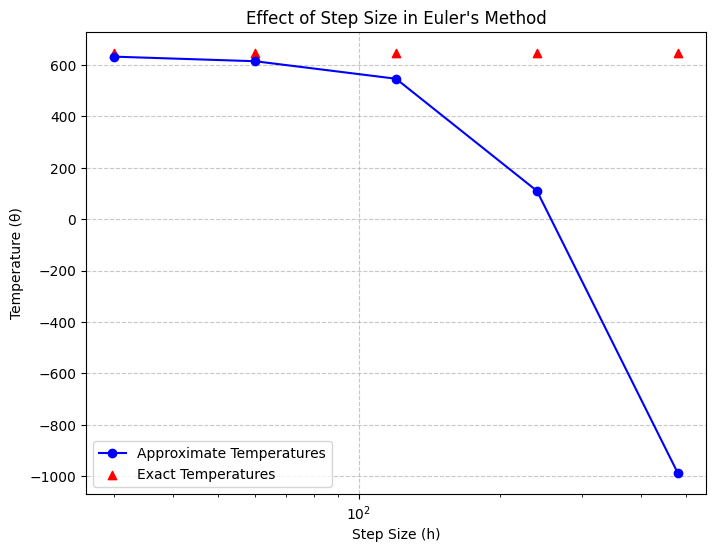

In [ ]:
# Write your code here.

import matplotlib.pyplot as plt

def Euler(x_0, y_0, h, x):
    #Write your code here.
    steps = int((x - x_0) / h)
    x_i = x_0
    y_i = y_0

    for i in range(steps):
        y_i += f(x_i, y_i) * h
        x_i += h

    return y_i

t_0 = 0
theta_0 = 1200
t_target = 480
step_sizes = [480, 240, 120, 60, 30]

approximate_temperatures = []
exact_temperatures = []

for h in step_sizes:
    approximate_temperature = Euler(t_0, theta_0, h, t_target)
    approximate_temperatures.append(approximate_temperature)
    exact_solution = fsolve(exact_equation, theta_initial_guess, args=(t_target,))[0]
    exact_temperatures.append(exact_solution)

plt.figure(figsize=(8, 6))
plt.plot(step_sizes, approximate_temperatures, marker='o', linestyle='-',color='blue', label='Approximate Temperatures')
plt.scatter(step_sizes, exact_temperatures, marker='^', color='red', label='Exact Temperatures')
plt.xlabel('Step Size (h)')
plt.ylabel('Temperature (θ)')
plt.title('Effect of Step Size in Euler\'s Method')
plt.legend()
plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Your graph should look something like,
<br>
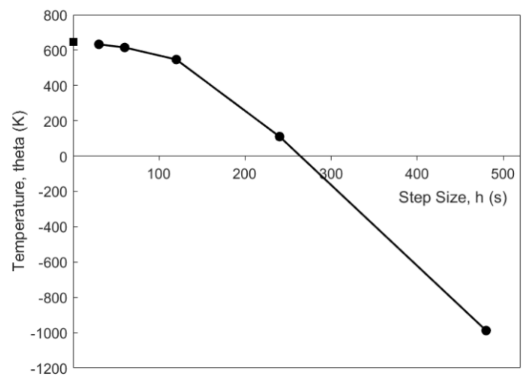

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Euler's method approximations for different step sizes with the exact solution.

<ipython-input-32-5c182b8565cd>:25: RuntimeWarning: invalid value encountered in log
  return 0.92593 * np.log((theta - 300) / (theta + 300)) - 1.8519 * np.arctan(0.333e-2 * theta) + 0.22067e-3 * t + 2.9282


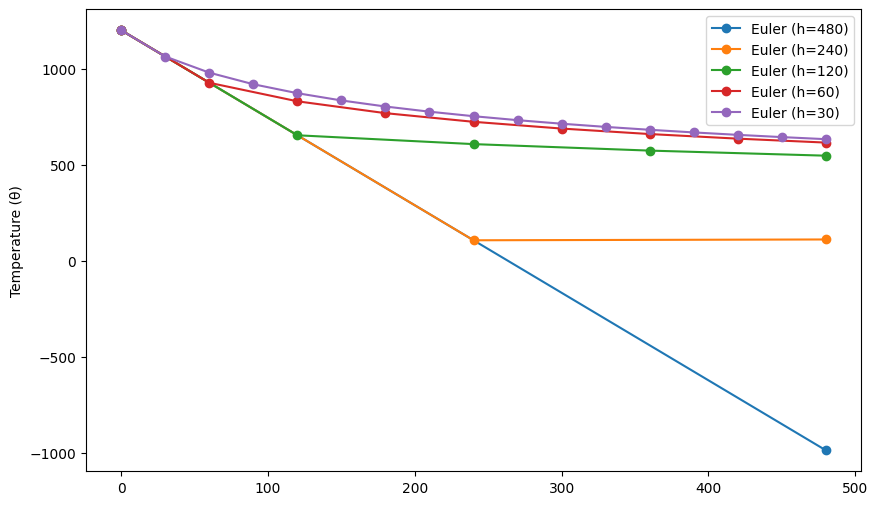

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def Euler(x_0, y_0, h, x):
    #Write your code here.
    steps = int((x - x_0) / h)
    x_i = x_0
    y_i = y_0

    times = [x_i]
    temperatures = [y_i]

    for i in range(steps):
        y_i += f(x_i, y_i) * h
        x_i += h

        times.append(x_i)
        temperatures.append(y_i)

    return times, temperatures

def exact_solution(t):
    def exact_equation(theta):
       return 0.92593 * np.log((theta - 300) / (theta + 300)) - 1.8519 * np.arctan(0.333e-2 * theta) + 0.22067e-3 * t + 2.9282

    theta_guess = 1200
    theta_exact = fsolve(exact_equation, theta_guess)[0]
    return theta_exact

t_0 = 0
theta_0 = 1200
t_target = 480
step_sizes = [480, 240, 120, 60, 30]

plt.figure(figsize=(10, 6))
t_exact = np.linspace(t_0, t_target, 1000)
exact_solution_values = [exact_solution(t) for t in t_exact]


for h in step_sizes:
    t_approx, theta_approx = Euler(t_0, theta_0, h, t_target)
    plt.plot(t_approx, theta_approx, label=f'Euler (h={h})', marker='o')

plt.ylabel('Temperature (θ)')
plt.legend()
plt.show()



Your graph should look something like,
<br>
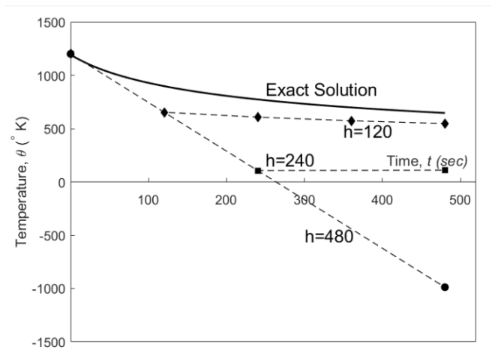